In [85]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import mpl_toolkits.mplot3d

In [86]:
def mse(ws, model, X, Y):
    N = len(X)
    err = 0.0
    for i in range(N):
        xi = X[i]
        yi = model(ws, xi)
        err += (Y[i] - yi) ** 2
    return err / N

def grad_mse(ws, model, gradients, X, Y):
    """
    Manually compute the gradient of MSE loss w.r.t. weights ws.

    Args:
        ws (np.ndarray): weight vector (shape: Mx1 or flat)
        model (callable): model(ws, x) → scalar prediction
        gradients (list of callables): gradients[j](ws, x) → ∂model/∂ws[j]
        X (np.ndarray): input data, shape (N, D)
        Y (np.ndarray): true labels, shape (N,) or (N,1)

    Returns:
        np.ndarray: gradient vector of shape (M, 1)
    """
    N = len(X)
    M = len(ws)
    grad_ws = np.zeros(M)

    for i in range(N):
        xi = X[i]
        yi = Y[i]
        pred = model(ws, xi)
        error = yi - pred

        for j in range(M):
            grad_ws[j] += error * gradients[j](ws, xi)

    grad_ws = -2 / N * grad_ws
    return grad_ws


def grad_desc_mse(K, ws, learning_eps, loss_fn, grad_loss_fn, verbose=False):
    """
    Gradient descent for minimizing MSE loss.

    Args:
        K (int): Number of iterations.
        ws (np.ndarray): Initial weight vector.
        learning_eps (float): Learning rate.
        loss_fn (callable): loss_fn(ws) → scalar loss.
        grad_loss_fn (callable): grad_loss_fn(ws) → gradient array same shape as ws.
        verbose (bool): If True, plots parameter updates in 2D.

    Returns:
        ws (np.ndarray): Final weights.
        history (list of float): Loss value at each iteration (length K+1).
    """
   

    history = [loss_fn(ws)]
    wsHistory = [ws.copy()]
    for k in range(K):
        grad_ws = grad_loss_fn(ws)
        loss = loss_fn(ws)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        # Store parameters at each step
        # if verbose:
        #     # Draw a line from old_ws to new ws (assumes ws has at least 2 elements)
        #     plt.plot(
        #         [old_ws[0], ws[0]],
        #         [old_ws[1], ws[1]],
        #         'ro--'
        #     )
        # print(f"Iteration {k}, MSE: {loss_fn(ws)}, Weights: {ws}")
        wsHistory.append(ws)
        history.append(loss)
    return ws, history, np.array(wsHistory)



def plot3d(f, A, B, show_colorbar=True):
    """
    Plots a 3D surface of function f(x1, x2) over meshgrid A, B with MATLAB-like orientation.
    
    Parameters:
    - f: function of (x1, x2)
    - A, B: meshgrid arrays
    - show_colorbar: whether to display the color bar
    """
    # Create a vectorized version of the function
    if not hasattr(f, 'vectorized'):
        f_vec = np.vectorize(f)
    else:
        f_vec = f
    
    # Apply function to each element in the meshgrid
    Z = f_vec(A, B)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='k')

    # Set axes labels
    # ax.set_xlabel('x1')
    # ax.set_ylabel('x2')
    # ax.set_zlabel('f(x1, x2)')

    # Set viewing angle: azim=-135, elev=30 gives MATLAB-style view with (0,0) front left
    ax.view_init(elev=30, azim=-135)


    # Add tighter colorbar
    if show_colorbar:
        # Create colorbar next to the plot (adjust size and position)
        mappable = plt.cm.ScalarMappable(cmap='viridis')
        mappable.set_array(Z)
        fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.1)

    # Clean layout
    plt.title('3D Surface Plot')
    plt.tight_layout()
    
    return fig


## Setting the scene

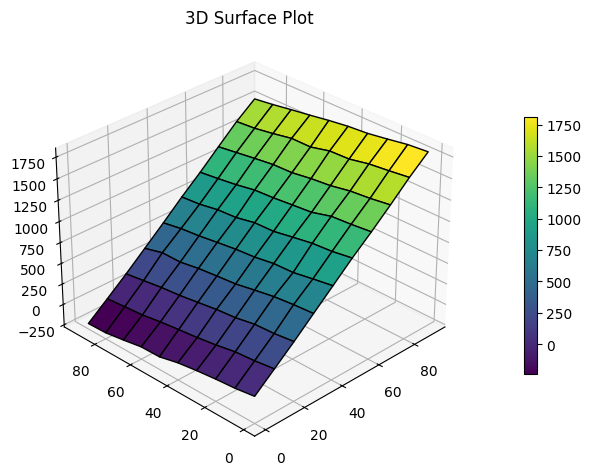

In [87]:
np.random.seed(1)

# Parameters
N = 100
a10 = 20
a20 = -3

## Generate full-fatorial design and reverse columns
XX = np.array(list(itertools.product(range(1, N + 1), repeat=2)))[::-1]

X1 = XX[:, 0]
X2 = XX[:, 1]

## define functions
f0 = lambda x1, x2: a10 * x1 + a20 * x2
f = lambda x1, x2, r: f0(x1, x2) + r

## Generate random noise
R = np.random.normal(0, 10, N*N)

# Compute Y values
Y = np.array([f(x1, x2, r) for x1, x2, r in zip(X1, X2, R)])

A, B = np.meshgrid(np.arange(1, N + 1, N / 10), np.arange(1, N + 1, N / 10))

# Plotting function
ff = lambda x1, x2: f(x1, x2, np.random.normal(0, 10))

plot3d(ff, A, B)
plt.show()

In [88]:
m1 = lambda ws, x: ws[0] * x[0] + ws[1] * x[1]
mse1 = lambda ws: mse(ws, m1, XX, Y)

In [89]:
import numpy as np

# Input and output dimensions
_in = 2
_out = 1

# Calculate the limit for the Glorot uniform initializer
_limit = np.sqrt(6 / (_in + _out))

# Initialize weights using Glorot uniform distribution
ws0 = np.random.uniform(-_limit, _limit, size=(2,))

print("Initial weights:", ws0)

Initial weights: [0.44754778 0.73534896]


In [90]:
print("Initial MSE:", f"{mse1(ws0):e}")

Initial MSE: 9.684953e+05


In [91]:
gradients1 = [
    lambda ws, x: x[0],  # First gradient function returns the first element of x
    lambda ws, x: x[1]   # Second gradient function returns the second element of x
]


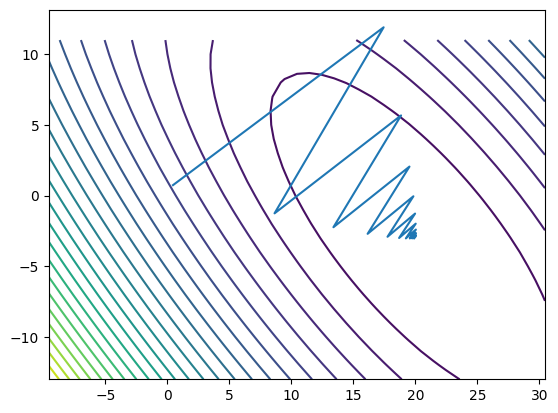

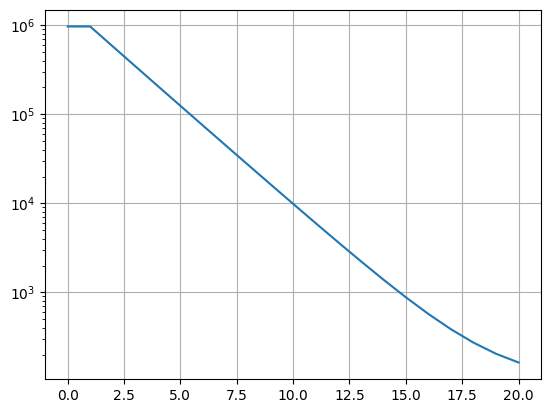

In [92]:

f = lambda a, b: mse1([a, b])

def plotCoutour(A, B, f):
    plt.figure(figsize=(10, 8))
    if not hasattr(f, 'vectorized'):
        f_vec = np.vectorize(f)
    else:
        f_vec = f
    
    # Apply function to each element in the meshgrid
    Z = f_vec(A, B)
    plt.contour(A, B, Z, levels=30)
    plt.grid(True)
    plt.show()

# Create the meshgrid
a_min = min(a10, ws0[0]) - 10
a_max = max(a10, ws0[0]) + 10
b_min = min(a20, ws0[1]) - 10
b_max = max(a20, ws0[1]) + 10
A, B = np.meshgrid(np.arange(a_min, a_max+1), np.arange(b_min, b_max+1))

Z = mse([A, B], m1, XX, Y)

# print(f"A shape: {A}")
# print(f"B shape: {B}")
# print(f"Z shape: {Z}")

grad_loss = lambda ws: grad_mse(ws, m1, gradients1, XX, Y)


# Run gradient descent
K = 20
learning_eps = 0.00015

plt.contour(A, B, Z, levels=30)

ws, history, wsHistory = grad_desc_mse(
    K,
    ws0,
    learning_eps,
    mse1,
    grad_loss,
    verbose=True
)

# Plot the contour and the gradient descent path
plt.plot(wsHistory[:, 0], wsHistory[:, 1], '-', label='Gradient Descent Path')
plt.show()

# Plot the MSE history
plt.plot(np.arange(len(history)), history, '-', label='MSE')
plt.grid(True)
plt.yscale('log')
# plt.ylim(min(history)-10, max(history)+10)
plt.show()

## Stochastic Gradient Descent(SGD)